__Regression of Air France Revenue:__

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# Hierarchical CLustering of OECD Composite Indicator
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pdb
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_excel('fpregress.xlsx', parse_dates=['Dates'], index_col='Dates')
df = df.interpolate().ffill().bfill()

df = df_model = df
df.head()
df.head(40).pct_change().iloc[[0,2,-2,-1],:]

,SALES_REV_TURN,EBITDA,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,SHORT_AND_LONG_TERM_DEBT,...,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,AVG_AIRCRAFT_FLIGHT_LEN,CF_FREE_CASH_FLOW,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,,,
2001-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-28,-0.093545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.055926,0.000000,0.004450
2011-09-30,0.088608,1.738095,-3.530965,0.067224,0.003373,-0.014733,-0.008061,-0.055657,-0.034258,0.007088,...,-0.050811,0.0,0.026300,0.100177,NaN,-0.003521,0.089633,-0.043682,0.181275,0.019261
2011-12-30,-0.110980,-0.722981,-1.642364,-0.053885,-0.016807,-0.150467,0.111634,-0.021359,-0.015213,-0.009196,...,0.033045,0.0,-0.055329,-0.017467,NaN,-0.731449,0.082260,0.152839,-0.001100,0.013175


                labels
countries             
SALES_REV_TURN       3
EBITDA               1
OPER_MARGIN          1
LOAD_FACTOR          3
BS_INVENTORIES       3


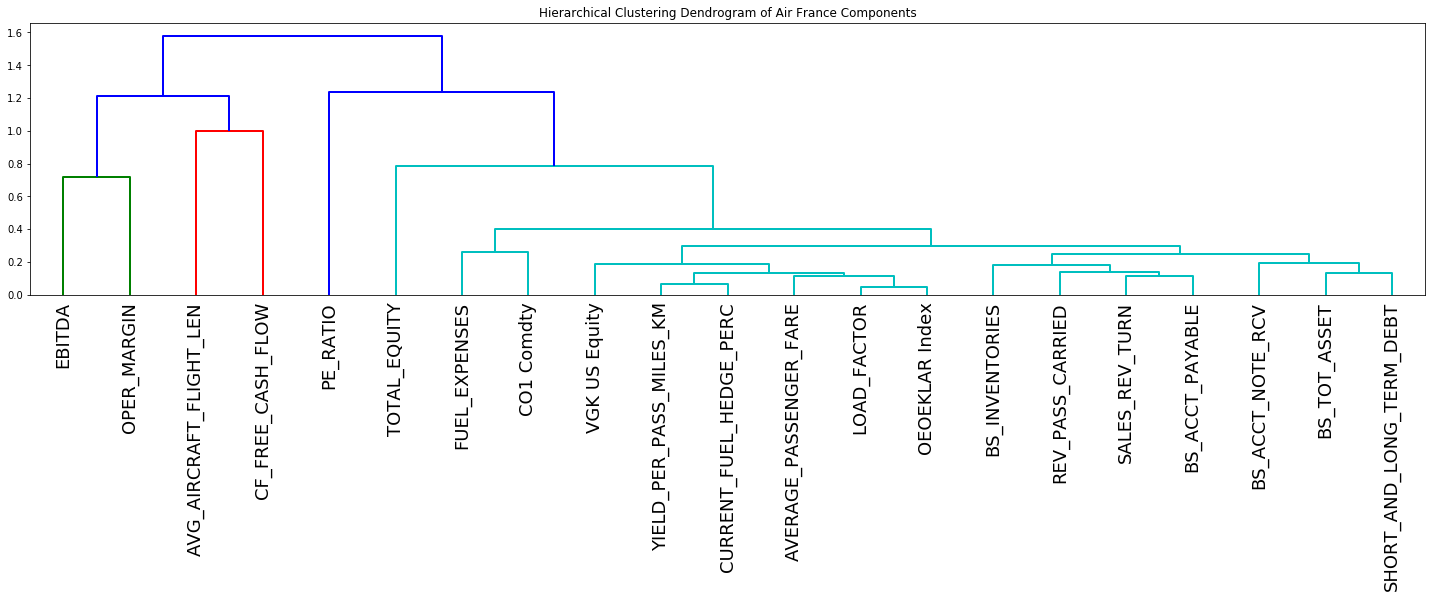

In [9]:
df_quadratic = df.resample('D').interpolate(method='quadratic')
x = df_quadratic.fillna(0).T

# Normalize the movements: normalized_movements
normalized_movements = normalize(x)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

labels = fcluster(mergings, 1.2, criterion='distance')
labels = pd.DataFrame({'labels':labels, 'countries':x.index}).set_index('countries')
print(labels.head())

# Plot the dendrogram
labelList = [i for i in x.index]

plt.figure(figsize=(25, 5))
plt.title('Hierarchical Clustering Dendrogram of Air France Components')
dendrogram(mergings,
           truncate_mode='level',
           leaf_rotation=90.,
           leaf_font_size=18.,
           labels=labelList,
           show_contracted=True)
plt.show();

In [19]:
y_names = 'CF_FREE_CASH_FLOW'
targets = df_model[y_names]
y = df_model[y_names].dropna()

# df_model = df_model.drop(columns='Adj Close')
features_names_model = df_model.columns.drop(y_names).tolist()      
features = (df_model[features_names_model]).fillna(0)

y_names = ['CF_FREE_CASH_FLOW']
# x_names = ['x', 'y', 'z']

feature_target_df = df_model[y_names + features_names_model].dropna()

In [21]:

# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)
# Create seasonnality
linear_features['Quarter_1_dummy'] = 

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.70 * features.shape[0])
train_features = X = linear_features[:train_size]
train_targets  = Y = targets[:train_size]
test_features  = x = linear_features[train_size:]
test_targets   = y = targets[train_size:]

print(linear_features.shape, train_features.shape, test_features.shape)
linear_features

(71, 21) (49, 21) (22, 21)


,const,SALES_REV_TURN,EBITDA,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,...,REV_PASS_CARRIED,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,AVG_AIRCRAFT_FLIGHT_LEN,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,,,
2001-06-29,1.0,3374,391.0,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,...,13723.0,9.0000,70.0,353.0,181.7387,0.0,28.4495,25.87215,37.97810,78.4651
2001-09-28,1.0,3207,391.0,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,...,13723.0,9.0000,70.0,353.0,181.7387,0.0,28.4495,32.00042,37.97810,79.0097
2001-12-28,1.0,2907,391.0,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,...,13723.0,9.0000,70.0,353.0,181.7387,0.0,28.4495,33.79006,37.97810,79.3613
2002-03-28,1.0,3040,391.0,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,...,13723.0,9.0000,70.0,353.0,181.7387,0.0,28.4495,25.40713,37.97810,79.4008
2002-06-28,1.0,3315,391.0,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,...,13723.0,9.0000,70.0,353.0,181.7387,0.0,31.1009,28.12003,37.97810,79.2291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-28,1.0,7545,1792.0,14.3804,88.300,676.0,2621.0,2610.0,3292.0,30828.0,...,28532.0,8.4563,59.0,1377.0,253.8553,0.0,420.3129,43.69434,43.40043,102.7172
2018-12-31,1.0,6538,770.0,0.5200,86.100,633.0,2191.0,2460.0,1865.0,29057.0,...,24462.0,7.4717,59.0,1336.0,210.8577,0.0,9.9849,53.87314,45.45368,103.6051
2019-03-29,1.0,5986,442.0,-4.7611,86.774,686.0,2592.0,2463.0,1933.0,30584.0,...,22674.0,7.4357,62.0,1201.0,215.0922,0.0,12.2340,49.38768,48.20978,104.4817


In [16]:
# Create the linear model and complete the least squares fit
model = sm.OLS(Y, X)
results = model.fit()  # fit the model
print(results.summary(), results.pvalues.sort_values(ascending=True))
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0


# Make predictions from our model for train and test sets
train_predictions = Yhat = results.predict(X)
test_predictions = yhat = results.predict(x)

ValueError: zero-size array to reduction operation maximum which has no identity